# Analysis of Covid-19 NYC data
We graph the latest data, the history of the reports, and the changes over time.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib import pyplot as plt
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.grid.which'] = "both"
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
def pltdflt(figsize=(12, 10)):
    fig, ax = plt.subplots(figsize=figsize)
    plt.grid(True, which="minor", linestyle="--")
    plt.grid(True, which="major", color="0.5")
    return fig, ax

In [3]:
dat = pd.read_csv("../case-hosp-death.csv")
dat["DATE_OF_INTEREST"] = pd.to_datetime(dat["DATE_OF_INTEREST"])
dat = dat.set_index("DATE_OF_INTEREST")

In [4]:
dat.head()

,NEW_COVID_CASE_COUNT,HOSPITALIZED_CASE_COUNT,DEATH_COUNT
DATE_OF_INTEREST,,,
2020-03-03,1,6.0,NaN
2020-03-04,5,10.0,NaN
2020-03-05,3,15.0,NaN
2020-03-06,7,11.0,NaN
2020-03-07,7,10.0,NaN


# Latest report
We generate a bar chart of the new cases/day.  Since there's weekly cyclicity, we also graph the 7 day rolling average.  The latter allows one to better see trends.  But the analysis is hampered by reporting delays - many sites don't promptly report the data.

Text(0.5, 1.0, 'Cases/day')

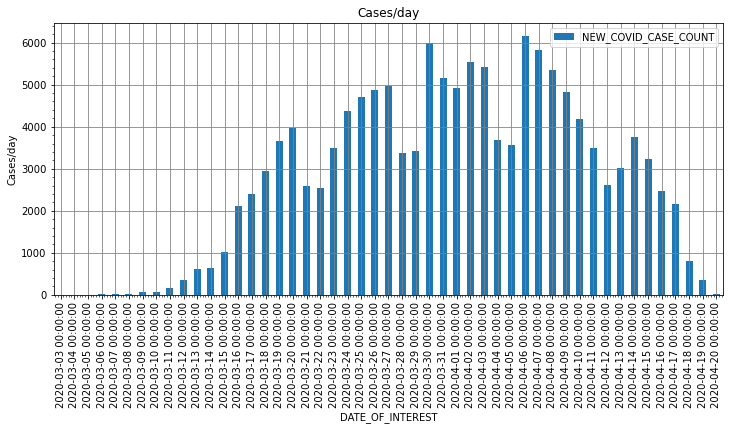

In [5]:
fig, ax = pltdflt(figsize=(12,5))
dat[["NEW_COVID_CASE_COUNT"]].plot(kind="bar", ax=ax)
plt.grid(False, which="minor")
plt.ylabel("Cases/day")
plt.title("Cases/day")

In [6]:
dat["Cases/day, 7 day avg"] = dat["NEW_COVID_CASE_COUNT"].rolling(window="7D").mean()

Text(0.5, 1.0, 'Cases/day, 7 day average')

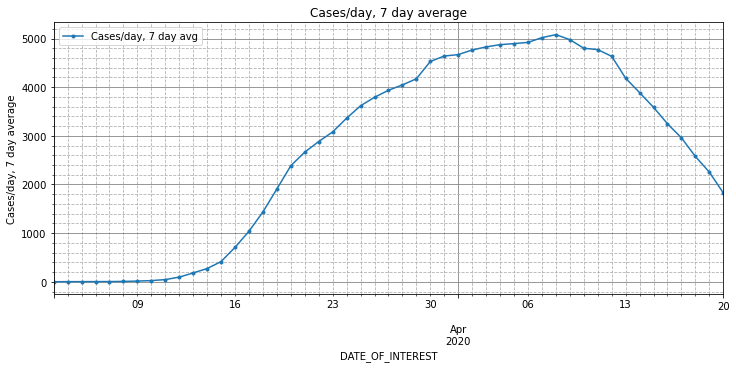

In [7]:
fig, ax = pltdflt(figsize=(12,5))

dat[["Cases/day, 7 day avg"]].plot(style=".-", ax=ax)
plt.ylabel("Cases/day, 7 day average")
plt.title("Cases/day, 7 day average")

# Historical analysis
We graph all of the historical reports to analyze the missing data.  We look at:
 - Cases/day and deaths/day
 - 7 day rolling average of above
 - 7 day rolling average of cases/day also in log scale
 
We see that it can take as long as 2 weeks (and sometimes longer) to get all of the data for a given date.

In [8]:
hdat = pd.read_csv("../history.csv")
hdat["DATE_OF_INTEREST"] = pd.to_datetime(hdat["DATE_OF_INTEREST"])
hdat["AS_OF"] = pd.to_datetime(hdat["AS_OF"])

In [9]:
hdat.head()

,DATE_OF_INTEREST,AS_OF,"Cases/day, 7 day avg",DEATH_COUNT,"Deaths/day, 7 day avg",HOSPITALIZED_CASE_COUNT,"Hospitalized/day, 7 day avg",NEW_COVID_CASE_COUNT
0,2020-03-02,2020-03-26 11:26:41,1.00,NaN,NaN,NaN,NaN,1
1,2020-03-03,2020-03-26 11:26:41,1.50,NaN,NaN,3.0,3.000000,2
2,2020-03-04,2020-03-26 11:26:41,4.00,NaN,NaN,3.0,3.000000,9
3,2020-03-05,2020-03-26 11:26:41,3.25,NaN,NaN,4.0,3.333333,1
4,2020-03-06,2020-03-26 11:26:41,4.20,NaN,NaN,5.0,3.750000,8


In [10]:
dp = hdat.pivot_table(index="DATE_OF_INTEREST",
                      columns="AS_OF",
                      values="Cases/day, 7 day avg")

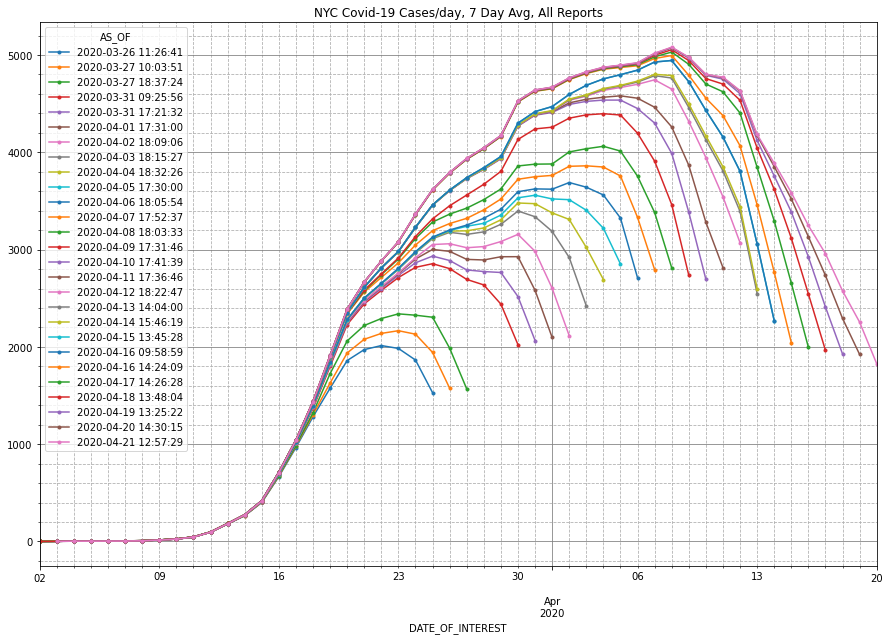

In [11]:
fig, ax = pltdflt((15,10))
dp.plot(style=".-", ax=ax)
#date_form = DateFormatter("%m-%d")
#ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
#plt.show()
plt.title("NYC Covid-19 Cases/day, 7 Day Avg, All Reports")
plt.savefig("casesPerDayHistory.png")

Text(0.5, 1.0, 'NYC Covid-19 Cases/day, 7 Day Avg, All Reports')

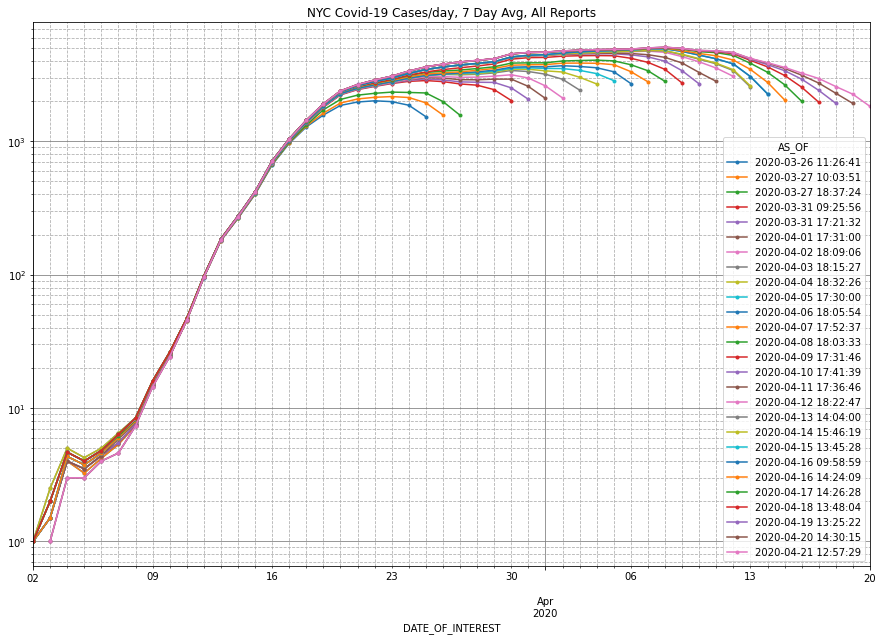

In [12]:
fig, ax = pltdflt((15,10))
ax.set_yscale("log")
dp.plot(style=".-", ax=ax)
#date_form = DateFormatter("%m-%d")
#ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
#plt.show()
plt.title("NYC Covid-19 Cases/day, 7 Day Avg, All Reports")


In [13]:
dp = hdat.pivot_table(index="DATE_OF_INTEREST",
                      columns="AS_OF",
                      values="Deaths/day, 7 day avg")

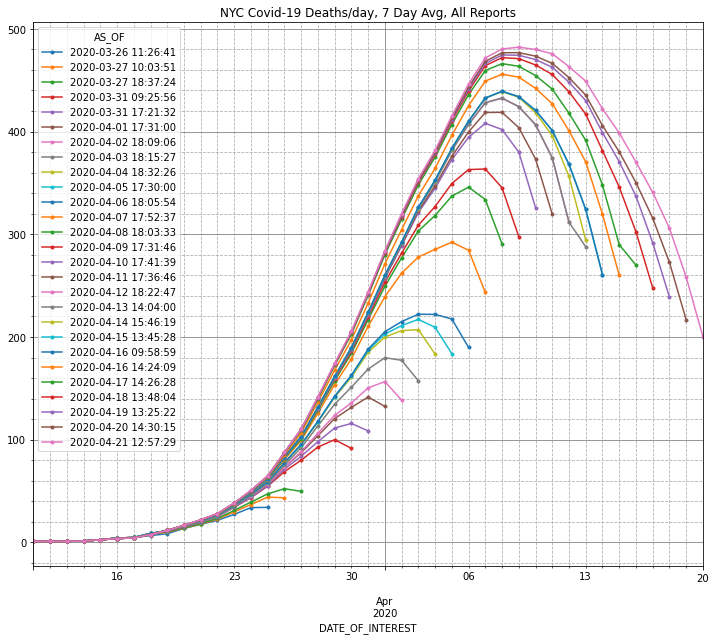

In [14]:
fig, ax = pltdflt()
dp.plot(style=".-", ax=ax)
plt.title("NYC Covid-19 Deaths/day, 7 Day Avg, All Reports")
plt.savefig("deathsPerDayHistory.png")

In [15]:
dp = hdat.pivot_table(index="DATE_OF_INTEREST",
                      columns="AS_OF",
                      values="NEW_COVID_CASE_COUNT")

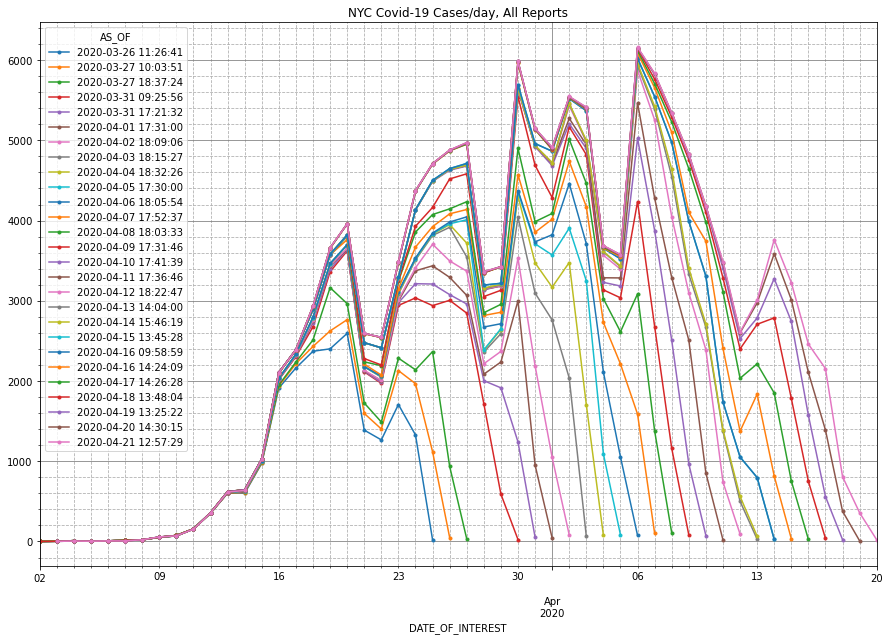

In [16]:
fig, ax = pltdflt((15,10))
dp.plot(style=".-", ax=ax)
#date_form = DateFormatter("%m-%d")
#ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
#plt.show()
plt.title("NYC Covid-19 Cases/day, All Reports")
plt.savefig("casesPerDayHistoryRaw.png")

In [17]:
dp = hdat.pivot_table(index="DATE_OF_INTEREST",
                      columns="AS_OF",
                      values="DEATH_COUNT")

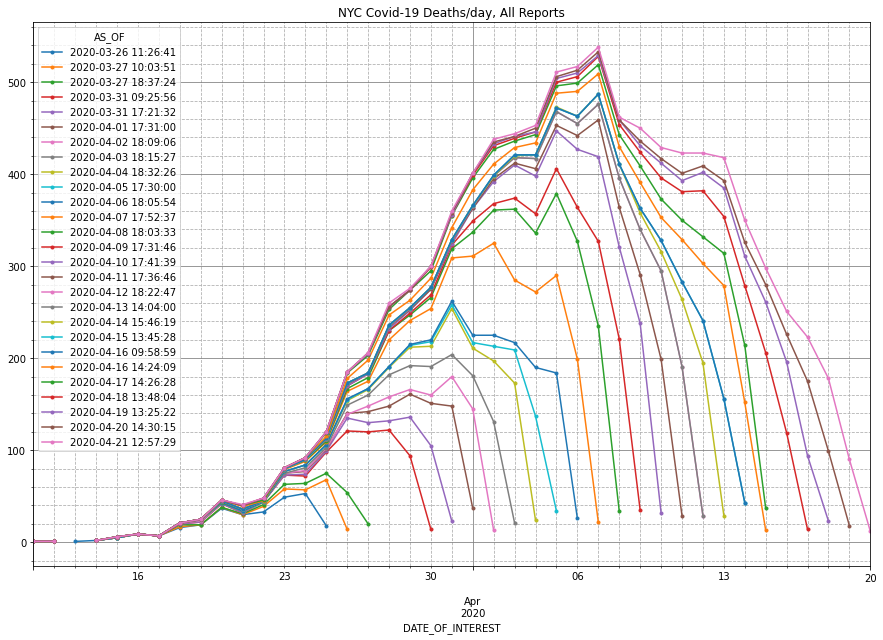

In [18]:
fig, ax = pltdflt((15,10))
dp.plot(style=".-", ax=ax)
#date_form = DateFormatter("%m-%d")
#ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
#plt.show()
plt.title("NYC Covid-19 Deaths/day, All Reports")
plt.savefig("deathsPerDayHistoryRaw.png")

# Growth rates
Various analyses of growth rates.  Done to see if we can model the missing data.  The idea is that if we can estimate the convergence rates of the data, we can use that to correct the latest reports to get a better picture.

In [19]:
hdat["Days"] = hdat.groupby("DATE_OF_INTEREST").cumcount()

In [20]:
df = hdat.groupby("DATE_OF_INTEREST").diff()
df["DATE_OF_INTEREST"] = hdat["DATE_OF_INTEREST"]
df["AS_OF"] = hdat["AS_OF"]
df["Days"] = hdat["Days"]

In [21]:
d2 = df.pivot_table(index="Days",
                   columns="DATE_OF_INTEREST",
                   values="Deaths/day, 7 day avg")

Text(0.5, 1.0, 'Change in deaths/day, 7 day avg, from day to day, as a function of the age of the report')

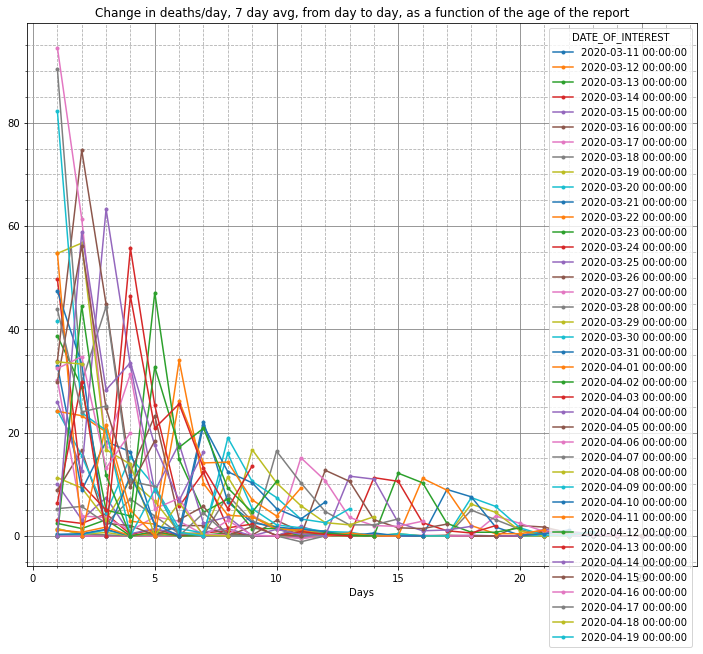

In [22]:
fig, ax = pltdflt()
d2.plot(style=".-", ax=ax)
plt.title("Change in deaths/day, 7 day avg, from day to day, as a function of the age of the report")

In [23]:
d3 = df.pivot_table(index="Days",
                   columns="DATE_OF_INTEREST",
                   values="NEW_COVID_CASE_COUNT")

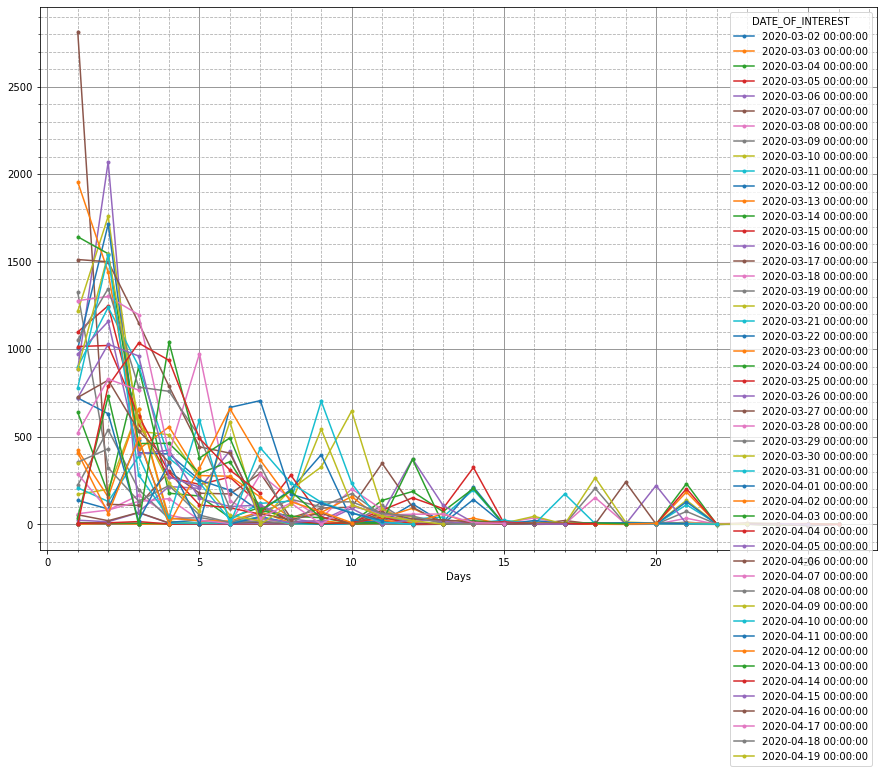

In [24]:
fig, ax = pltdflt(figsize=(15,10))
d3.plot(style=".-", ax=ax)

## Individual graphs
To better analyze the above data, we separately graph the values reported for each historical date. We look at the actual values and the change in values.

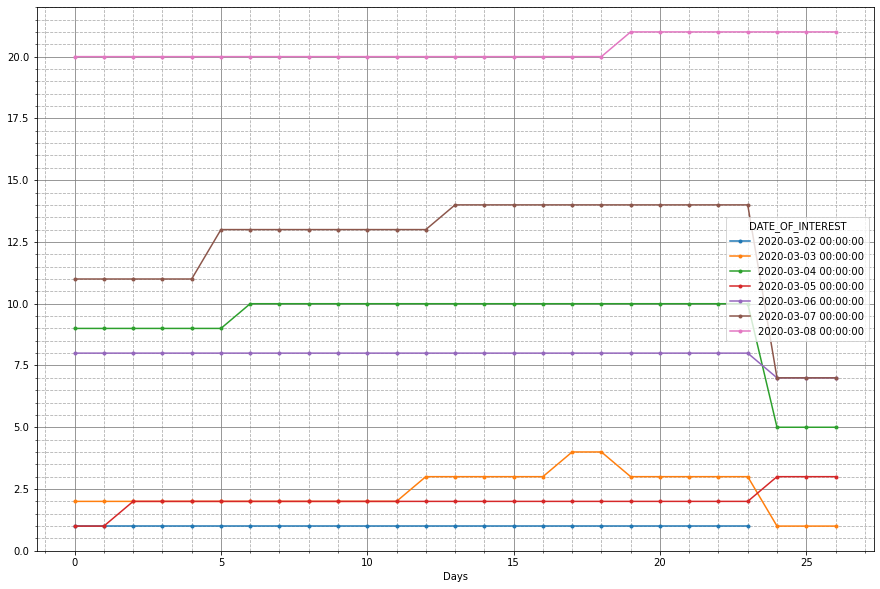

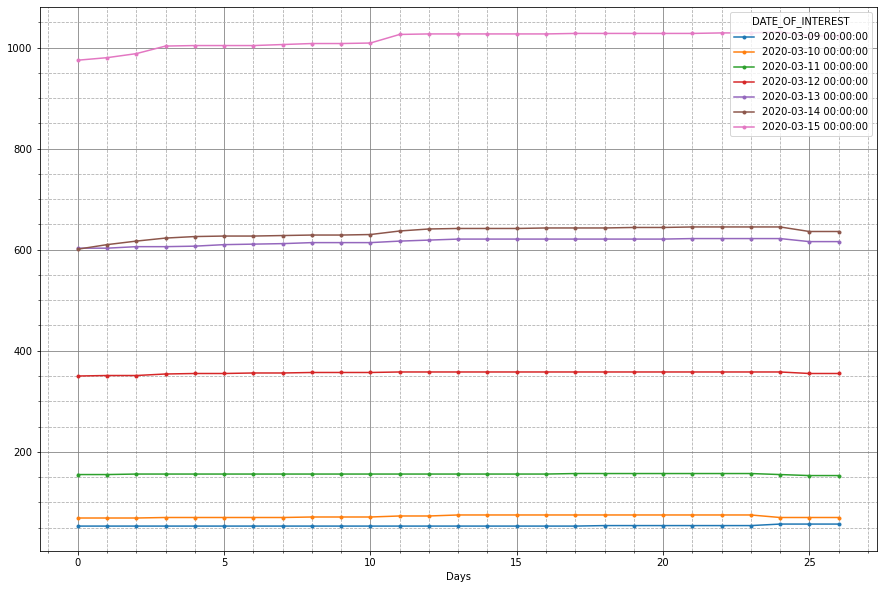

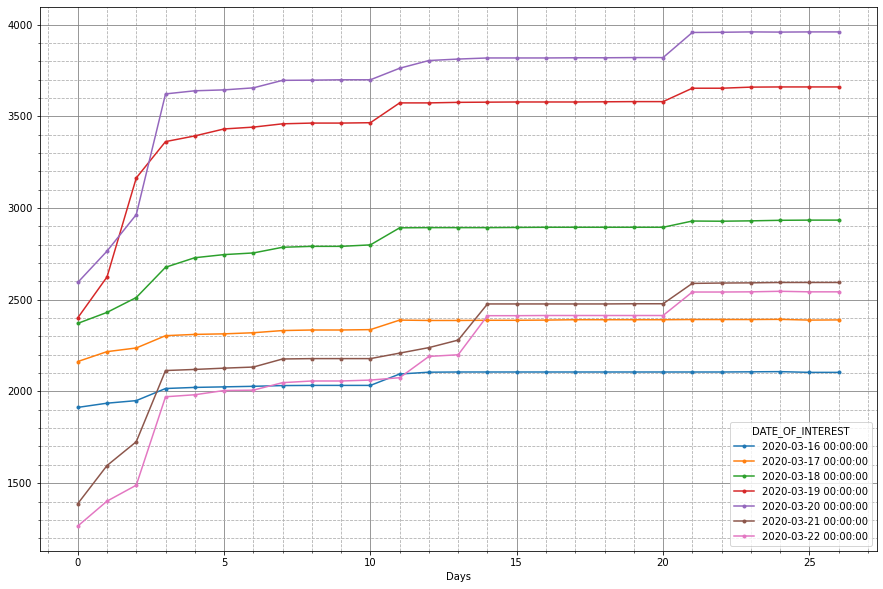

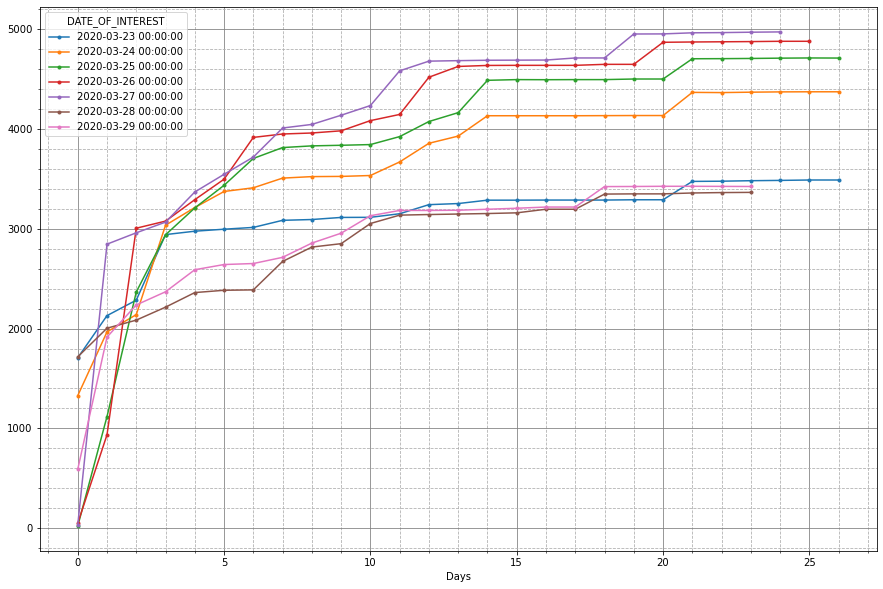

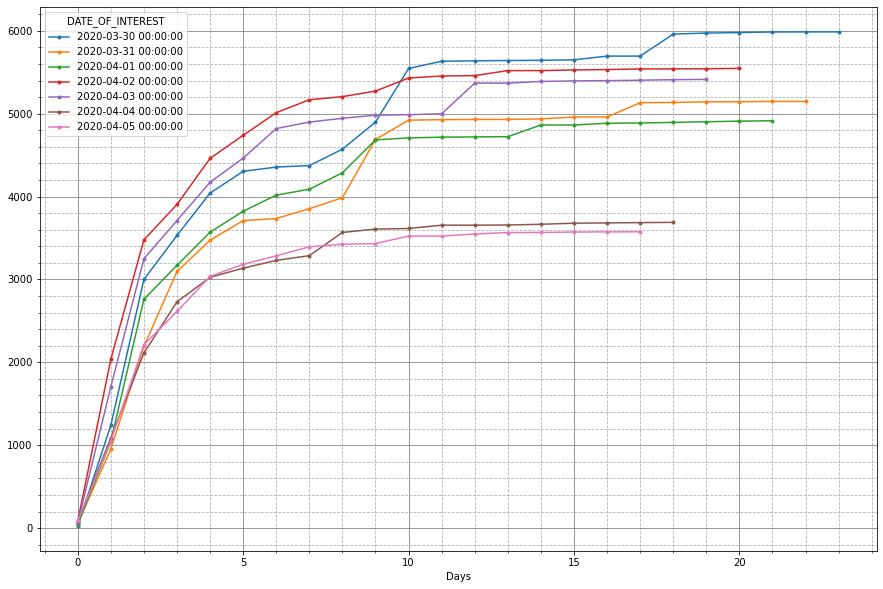

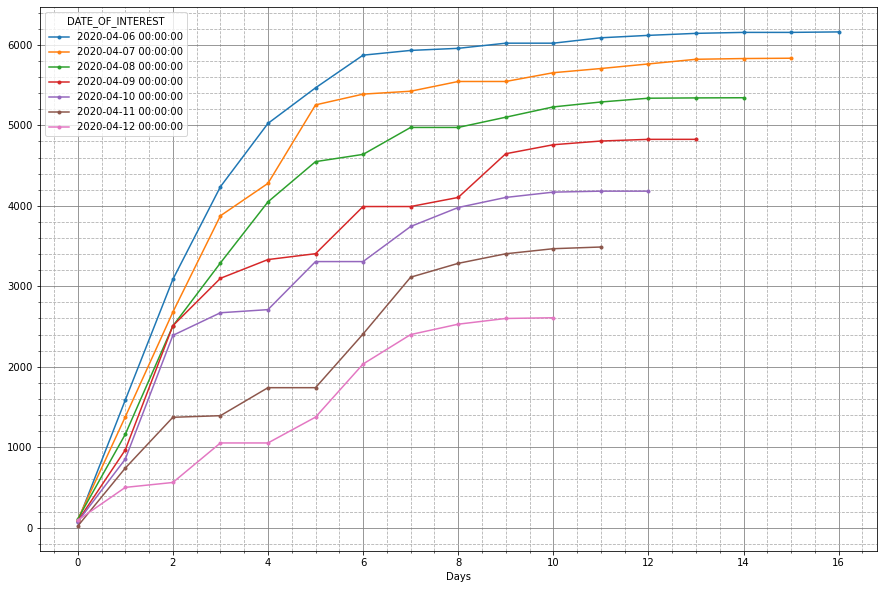

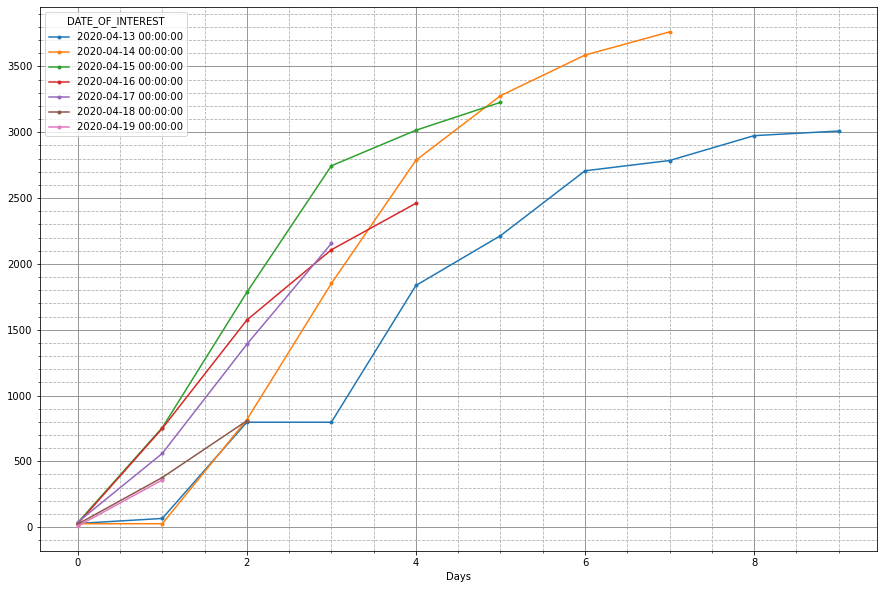

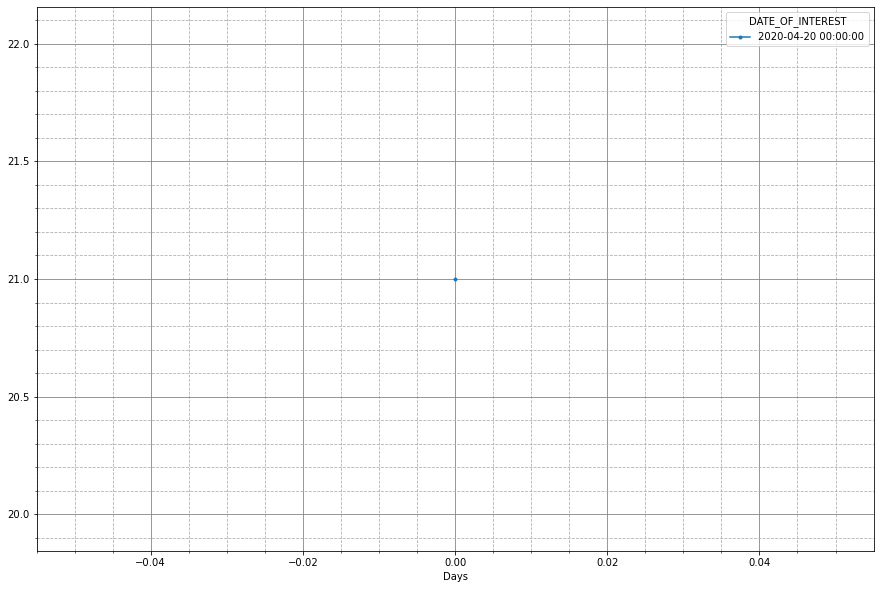

In [25]:
init = pd.to_datetime("2020-03-02")
delta = 7
for d in range(0, 60, delta):
    s = init +  pd.DateOffset(days=d)
    e = init +  pd.DateOffset(days=(d+delta))
    perday = hdat[(hdat["DATE_OF_INTEREST"] >= s) & (hdat["DATE_OF_INTEREST"] < e)] \
                 .pivot_table(index="Days",
                              columns="DATE_OF_INTEREST",
                              values="NEW_COVID_CASE_COUNT")
    if (len(perday) > 0):
        fig, ax = pltdflt(figsize=(15,10))
        perday.plot(style=".-", ax=ax)
        plt.show()

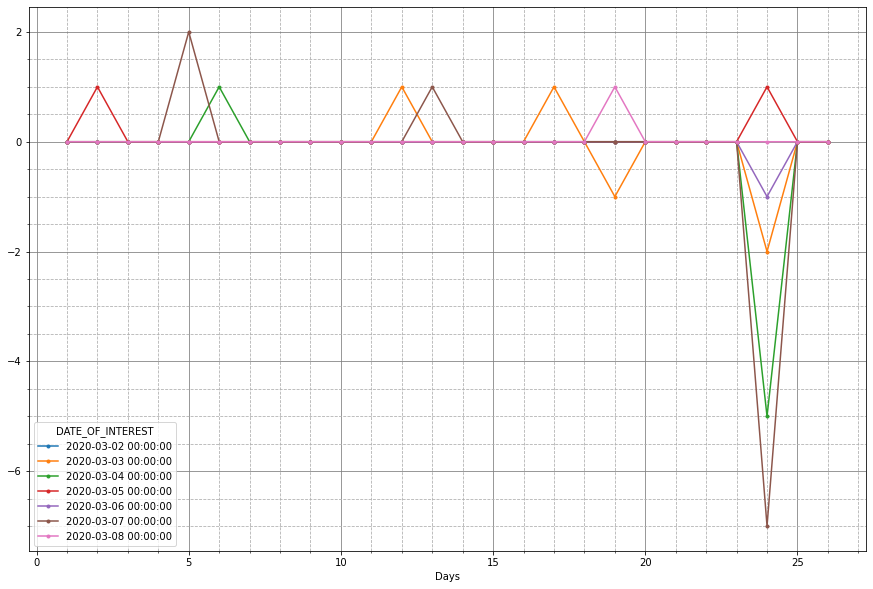

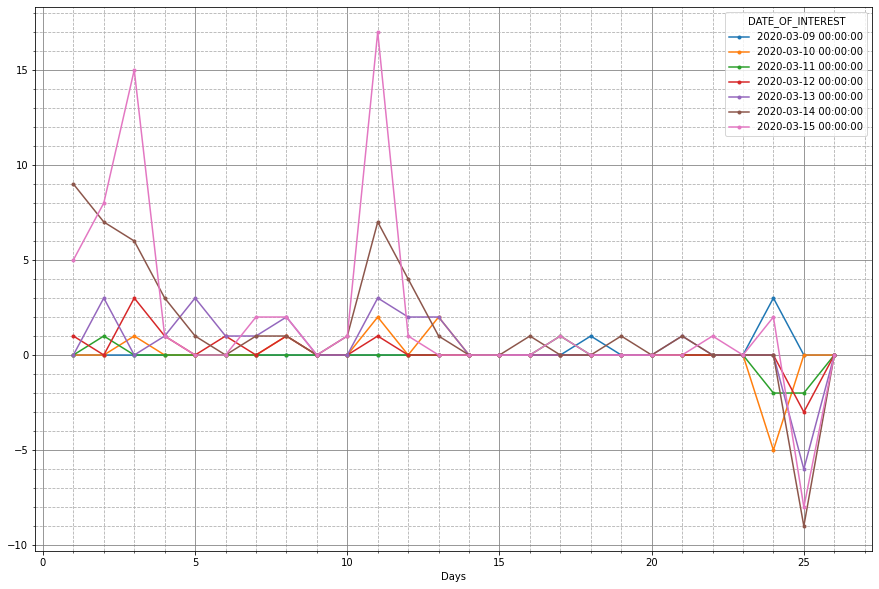

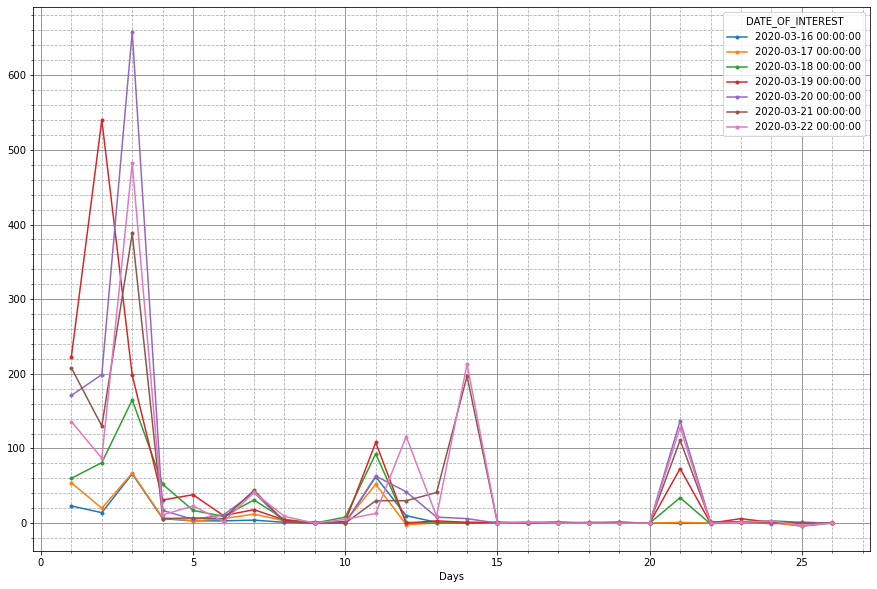

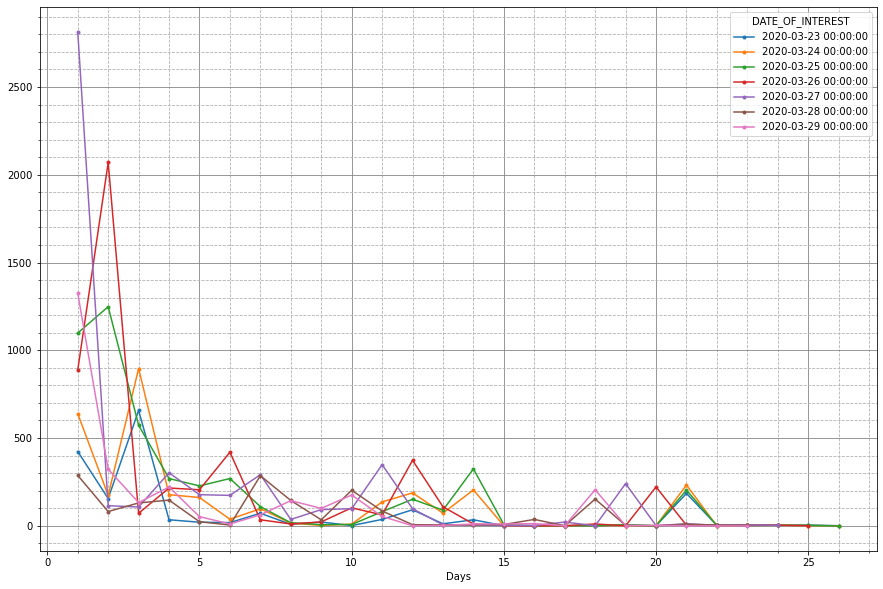

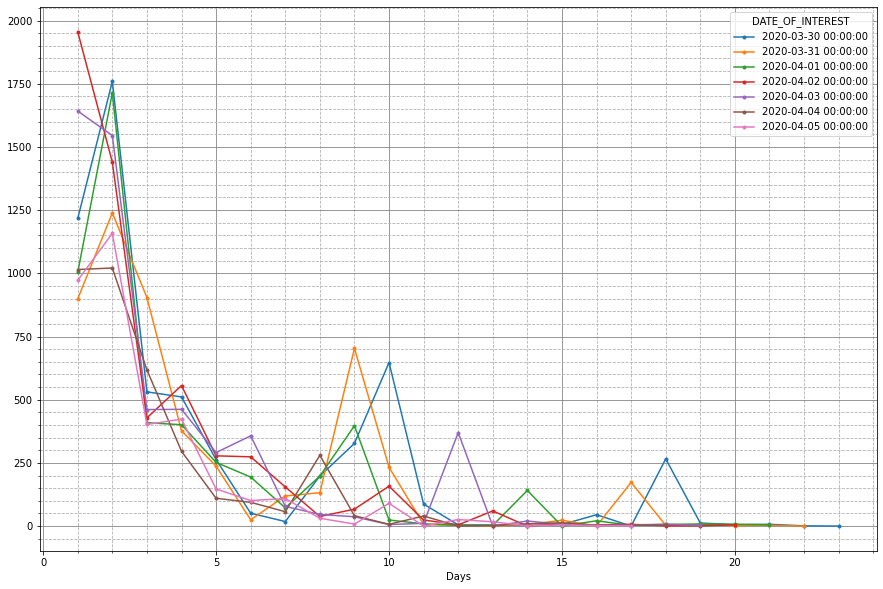

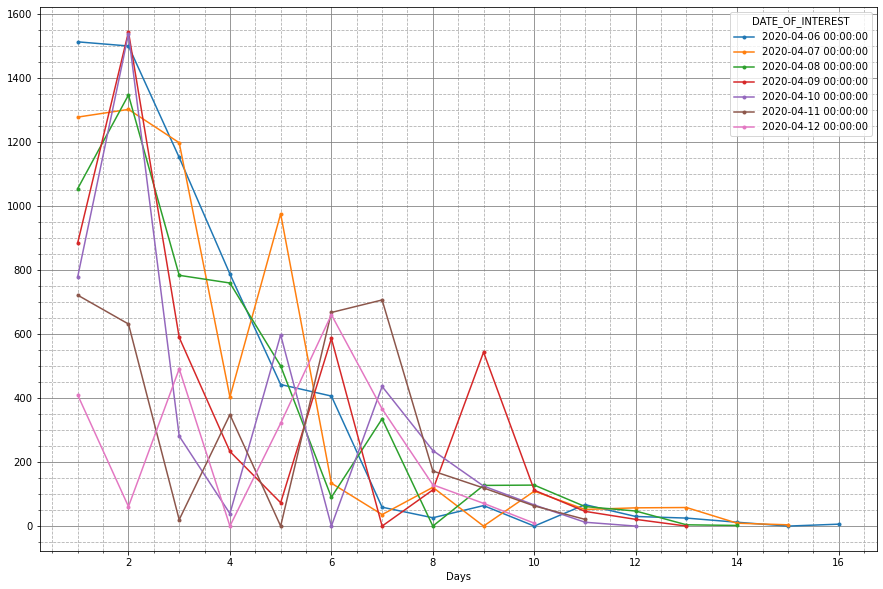

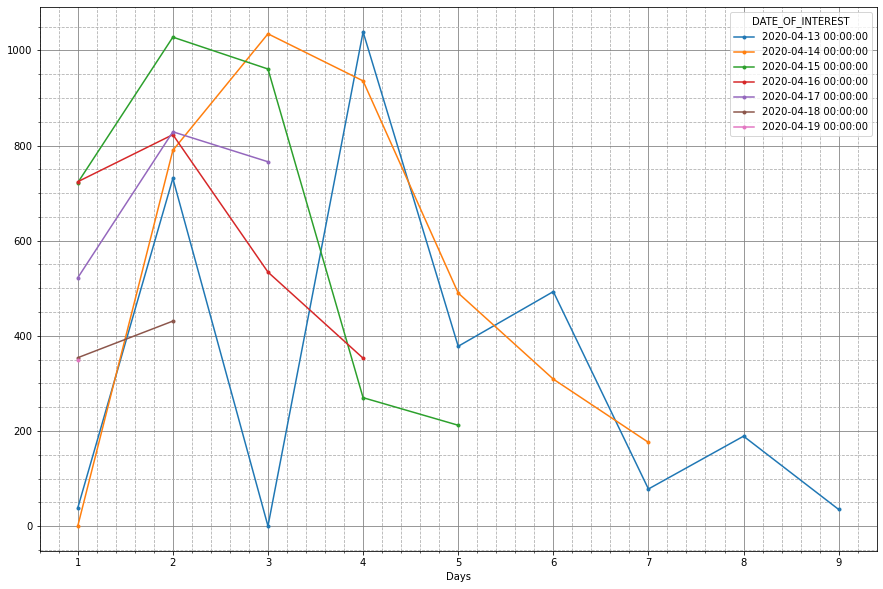

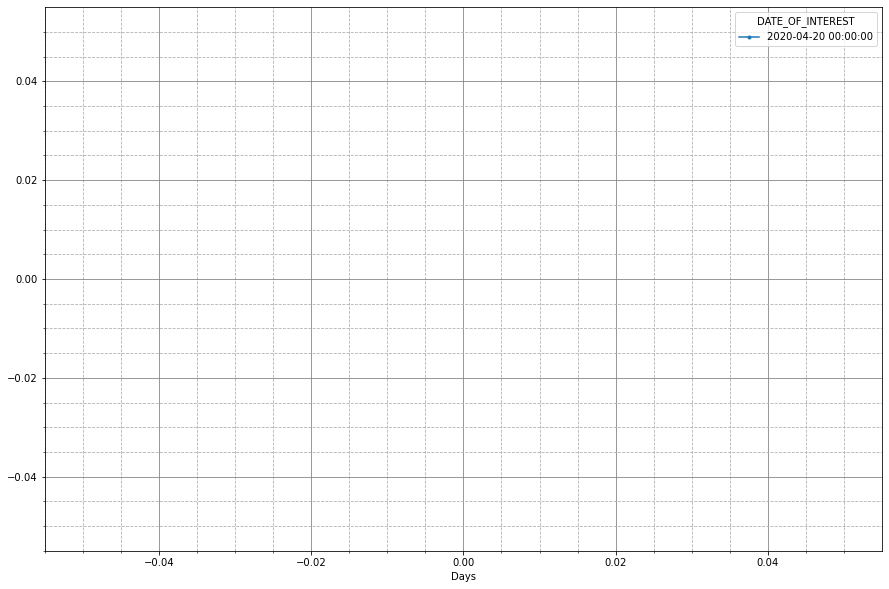

In [26]:
init = pd.to_datetime("2020-03-02")
delta = 7
for d in range(0, 60, delta):
    s = init +  pd.DateOffset(days=d)
    e = init +  pd.DateOffset(days=(d+delta))
    perday = hdat[(hdat["DATE_OF_INTEREST"] >= s) & (hdat["DATE_OF_INTEREST"] < e)] \
                 .pivot_table(index="Days",
                              columns="DATE_OF_INTEREST",
                              values="NEW_COVID_CASE_COUNT")
    perday = perday.diff()
    if (len(perday) > 0):
        fig, ax = pltdflt(figsize=(15,10))
        perday.plot(style=".-", ax=ax)
        plt.show()